# STOCK PREDICTION MODEL USING TFANN


#### Data Analytics is of paramount importance in today's world and it is used in Fintech, now more then ever. Using Colab's ML functionality, I tried to build a simple stock price predictor for stocks on any one organisation. 

#### For this model, I've used the dataset of Infosys Limited. I've utilised the stock variations of the company from over 5 years, but you can download even more data for effective prediction. You could also download weekly data for ensuring smooth trends, but I opted to go for daily variations over a period of 5 years as:
1. My model is simple and being a beginner in ML, I wanted to ensure that I get accurate data. 
2. Daily data gives accurate trends, and a simple model would be easier to train in that aspect

In [2]:
#installing tensorflow artificial neural network
!pip install TFANN

In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR 
from google.colab import files 

In [7]:
files.upload()

Saving infosys_stock_data.csv to infosys_stock_data (1).csv


{'infosys_stock_data.csv': b'Date,Date Value,Open,High,Low,Close,Adj Close,Volume\r\n27-04-2015,42121,7.89,7.97,7.745,7.8275,5.806324,25115600\r\n28-04-2015,42122,7.82,7.8925,7.7475,7.82,5.800762,21934000\r\n29-04-2015,42123,7.77,7.835,7.7625,7.7875,5.776653,15037600\r\n30-04-2015,42124,7.7425,7.7675,7.7175,7.745,5.745127,14210800\r\n01-05-2015,42125,7.7575,7.815,7.7475,7.7975,5.784071,6830800\r\n04-05-2015,42128,7.9375,8,7.885,7.885,5.848977,11470400\r\n05-05-2015,42129,7.79,7.8375,7.775,7.805,5.789635,9472000\r\n06-05-2015,42130,7.7175,7.73,7.6275,7.655,5.678368,11757200\r\n07-05-2015,42131,7.7575,7.78,7.66,7.705,5.715456,15061600\r\n08-05-2015,42132,7.7825,7.8125,7.7475,7.805,5.789635,10046800\r\n11-05-2015,42135,7.8975,7.9175,7.8075,7.825,5.80447,11815200\r\n12-05-2015,42136,7.6575,7.7225,7.65,7.67,5.689494,14971200\r\n13-05-2015,42137,7.715,7.7775,7.6725,7.6875,5.702475,7254800\r\n14-05-2015,42138,7.6925,7.71,7.6575,7.675,5.693202,6582000\r\n15-05-2015,42139,7.72,7.7825,7.6675,7.7

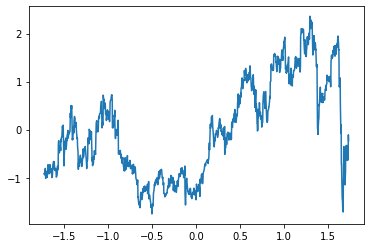

In [8]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('infosys_stock_data.csv', delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
stock_data=scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

# Constructing predictive models. In this section, you'll see that I've tried to use the same model but in 3 different variations. 
### The variations are in the terms of hidden layers and number of neurons. For the first two models, both the layers and neurons are equal but error tolerance has been tweaked. 
### In the final model, the number of neurons has been increased and I've added another hidden layer. 


In [0]:
#prediction attempt 1
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

In [13]:
#training the model
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      0.21578540 (Batch Size:   256)
Iter     2	      0.21661274 (Batch Size:   256)
Iter     3	      0.21595037 (Batch Size:   256)
Iter     4	      0.21027890 (Batch Size:   256)
Iter     5	      0.20667395 (Batch Size:   256)
Iter     6	      0.20855732 (Batch Size:   256)
Iter     7	      0.23772912 (Batch Size:   256)
Iter     8	      0.21820651 (Batch Size:   256)
Iter     9	      0.22145602 (Batch Size:   256)
Iter    10	      0.20998914 (Batch Size:   256)
Iter    11	      0.23235928 (Batch Size:   256)
Iter    12	      0.21286764 (Batch Size:   256)
Iter    13	      0.21289693 (Batch Size:   256)
Iter    14	      0.21814624 (Batch Size:   256)
Iter    15	      0.21685330 (Batch Size:   256)
Iter    16	      0.23155371 (Batch Size:   256)
Iter    17	      0.23002397 (Batch Size:   256)
Iter    18	      0.21780719 (Batch Size:   256)
Iter    19	      0.22121526 (Batch Size:   256)
Iter    20	      0.20951304 (Batch Size:   256)
Iter    21	      0.22414719 (Batch Size:

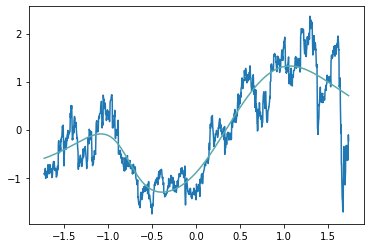

In [14]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [0]:
#prediction attempt 2
#increasing the fidelity
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [0]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

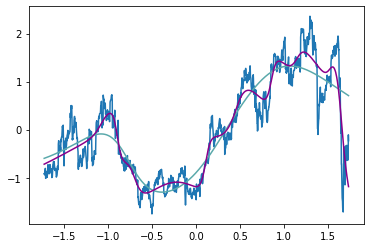

In [24]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

In [0]:
#prediction attempt 3
#increasing the fidelity
#number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 100
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.075, reg = 1e-4, verbose = True)

In [0]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

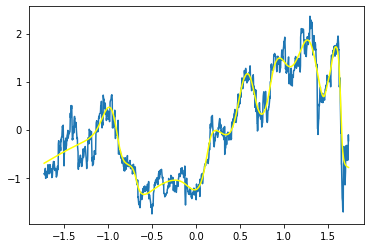

In [30]:
pricePredict3 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict3, c= '#FFFF00')
mpl.show()

# Final Prediction Graph

### The plot below illustrates all three predictive models. Since I've used regression and a simple model, there is a limitation as to the extent of accuracy. You can further tune the hyperparameters to ensure that the model yields better results, something that I did in the third prediction. 

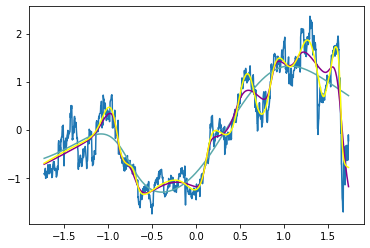

In [32]:
#final plot with all three predictions
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')    #indicates the first prediction
mpl.plot(dates, pricePredict2, c='#8B008B')   #indicates the second prediction (red)
mpl.plot(dates, pricePredict3, c='#FFFF00')   #indicates the third prediction  (yellow)
mpl.show()